In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 라이브러리 선언
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') # 나눔바른고딕 적용
plt.rc('axes', unicode_minus=False)       # 마이너스 기호 깨짐 방지

### 2. 다시 시작

In [2]:
d = pd.read_csv('/content/drive/MyDrive/김경훈/트라이얼위크/train.csv')
d.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [4]:
d.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.00000,10000.000000,10000.000000
mean,2.163959e+06,0.199300,12.248900,19.879360,1.175265e+06,0.62620,30.889200,0.373200,5.061200e+05,3.649126e+05,22367.28075,744.215000,0.341200
std,1.434430e+06,0.714304,4.620572,7.206693,1.604199e+06,1.23419,20.011561,0.843797,2.831462e+05,3.537942e+05,15186.49738,56.995698,0.474136
min,2.676210e+05,0.000000,2.000000,6.000000,0.000000e+00,0.00000,0.000000,0.000000,2.917650e+04,0.000000e+00,0.00000,502.000000,0.000000
25%,1.311437e+06,0.000000,9.000000,14.600000,4.482476e+05,0.00000,14.000000,0.000000,3.001901e+05,1.471856e+05,10893.75000,704.000000,0.000000
50%,1.743223e+06,0.000000,12.000000,17.950000,7.670910e+05,0.00000,28.000000,0.000000,4.743412e+05,2.547930e+05,20160.00000,756.000000,0.000000
75%,2.447664e+06,0.000000,15.000000,24.100000,1.147283e+06,1.00000,41.000000,0.000000,5.919079e+05,4.749180e+05,30647.25000,793.000000,1.000000
max,1.722975e+07,7.000000,35.000000,51.700000,2.323233e+07,7.00000,88.000000,3.000000,1.373613e+06,3.946300e+06,153574.50000,825.000000,1.000000


In [5]:
for col in d.columns:
    print(col, d[col].nunique())

UID 10000
주거 형태 4
연간 소득 9970
현재 직장 근속 연수 11
체납 세금 압류 횟수 8
개설된 신용계좌 수 33
신용 거래 연수 397
최대 신용한도 9585
신용 문제 발생 횟수 8
마지막 연체 이후 경과 개월 수 88
개인 파산 횟수 4
대출 목적 14
대출 상환 기간 2
현재 대출 잔액 9897
현재 미상환 신용액 9753
월 상환 부채액 8445
신용 점수 171
채무 불이행 여부 2


In [6]:
print(d.columns)

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')


In [7]:
### 범주 & 순서

In [8]:
col1 = ['주거 형태', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
         '신용 문제 발생 횟수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간']

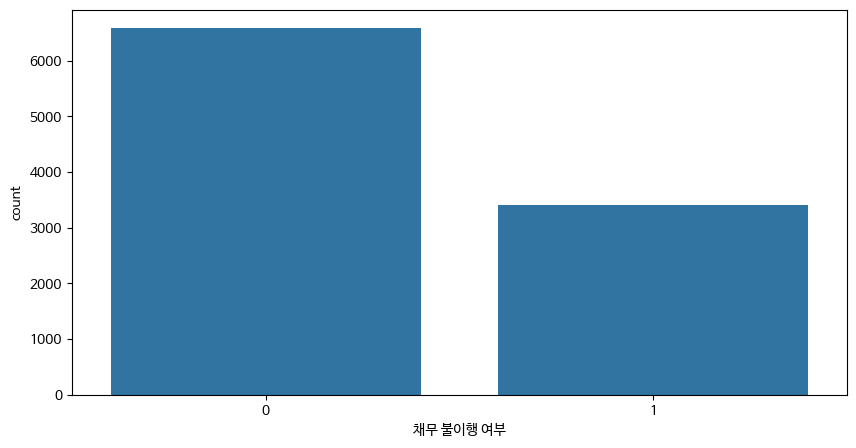

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data = d, x='채무 불이행 여부')
plt.show()

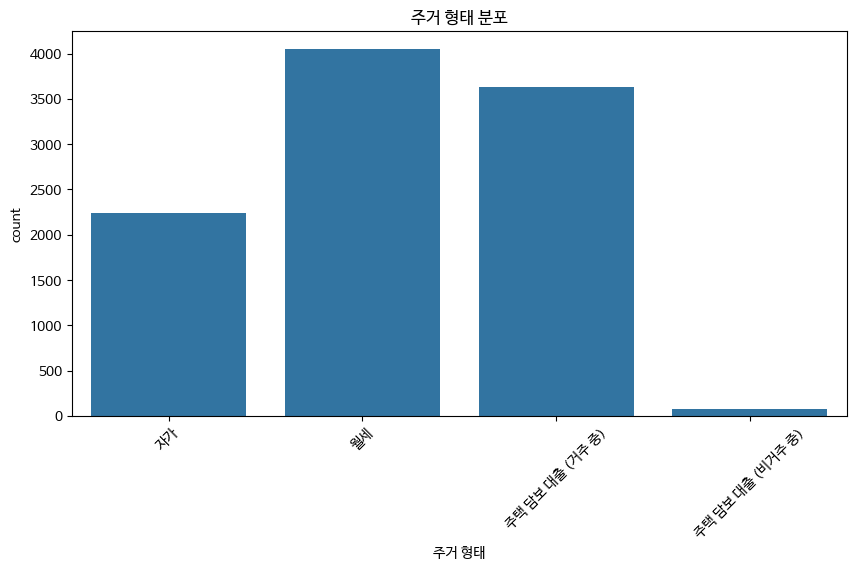

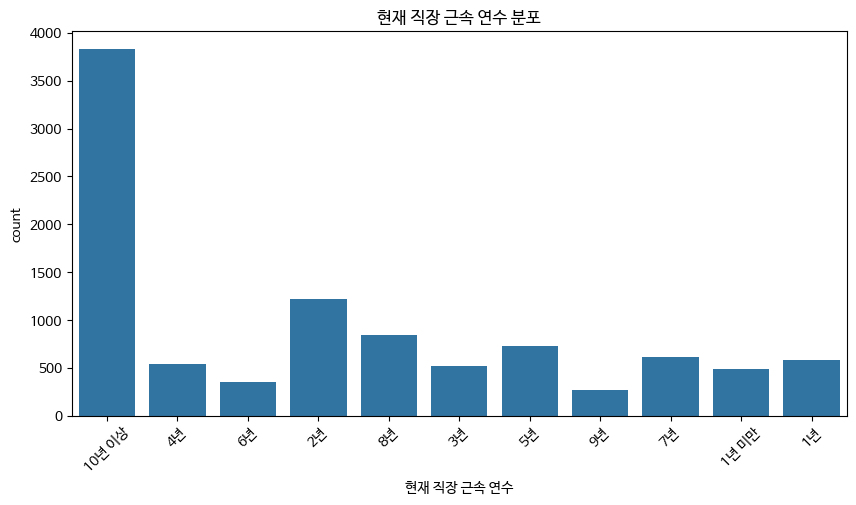

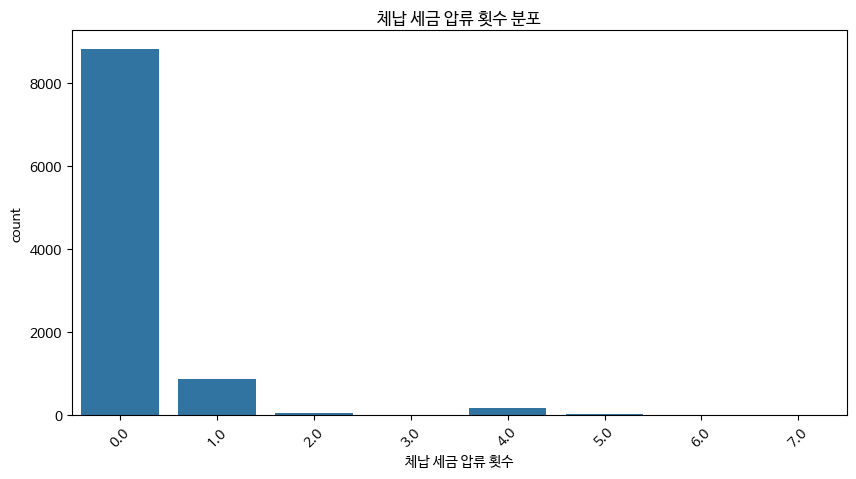

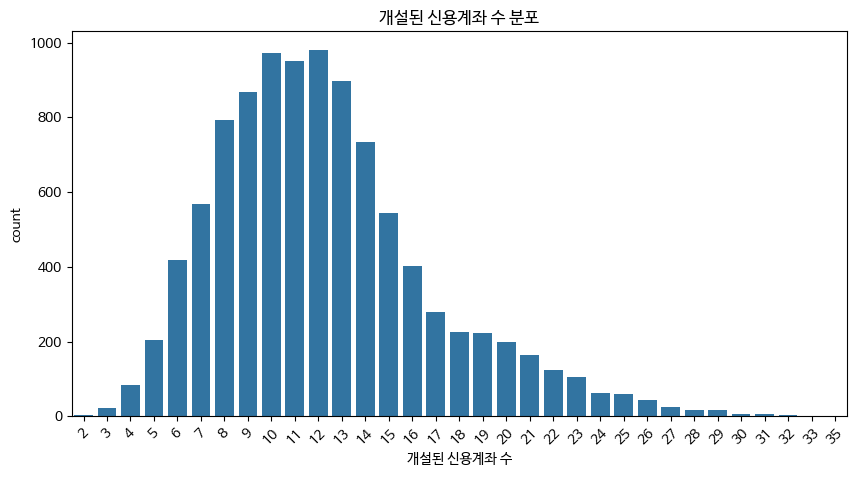

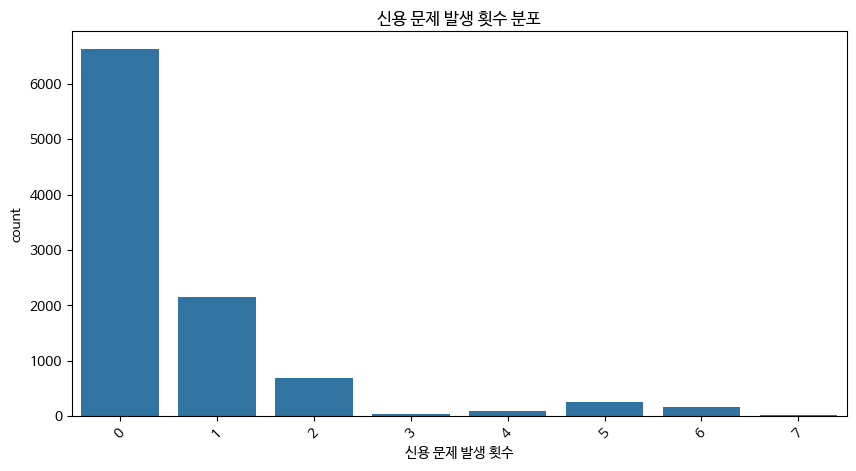

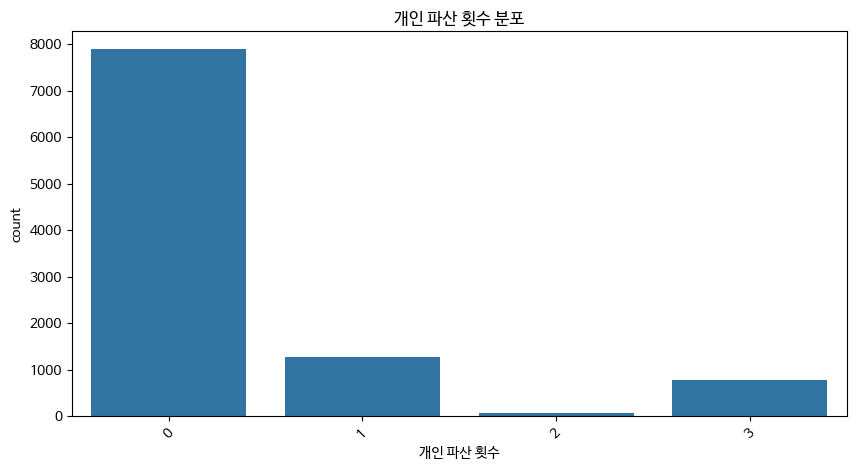

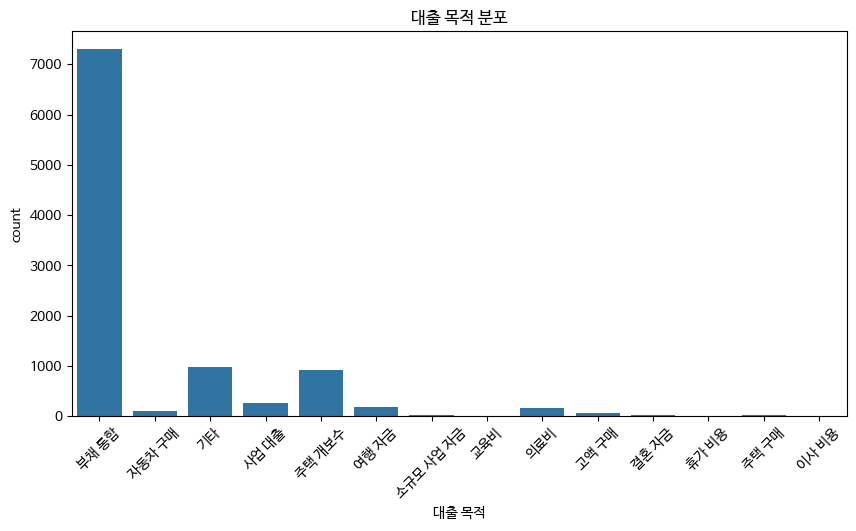

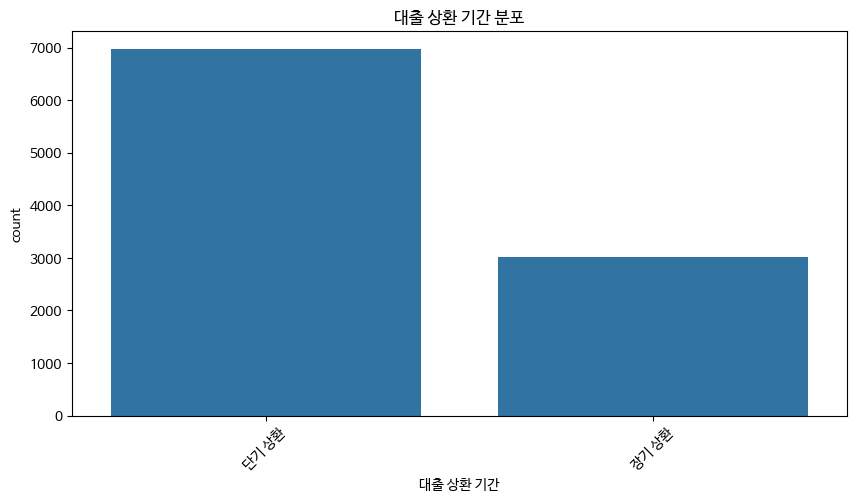

In [10]:
for col in col1:
    plt.figure(figsize=(10,5))
    sns.countplot(data=d, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} 분포')
    plt.show()

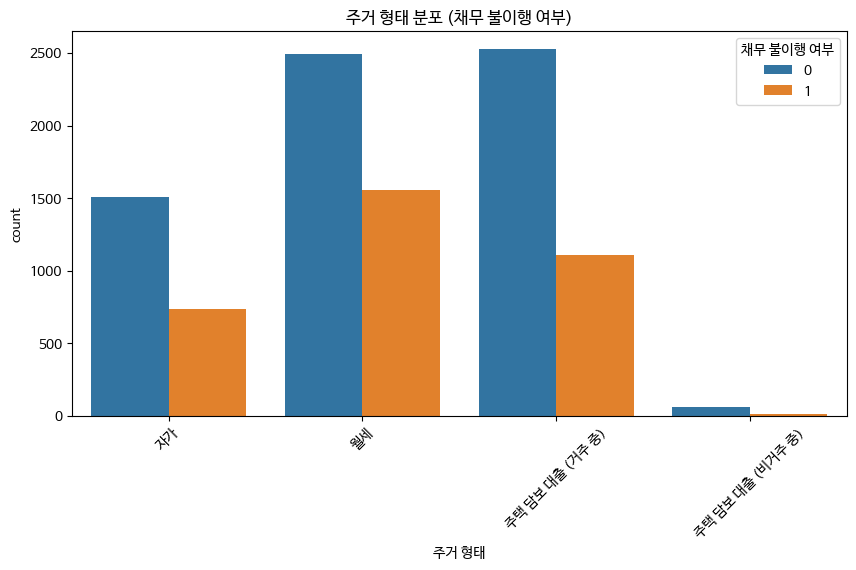

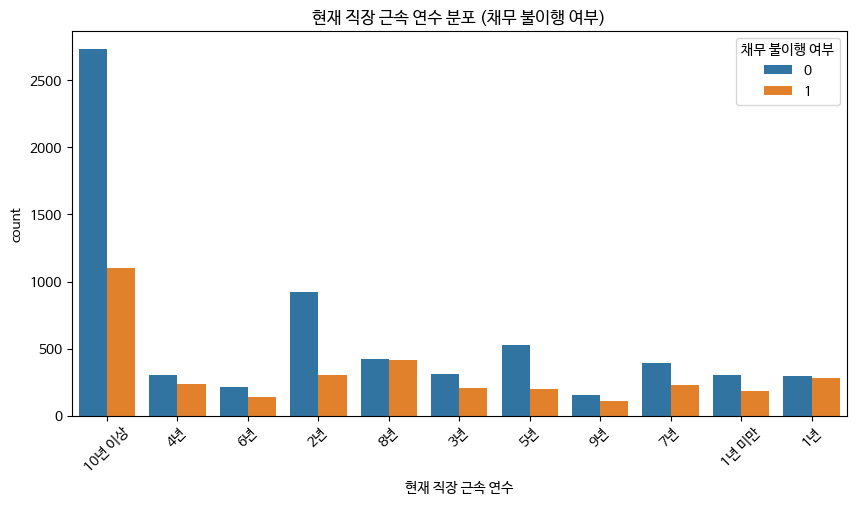

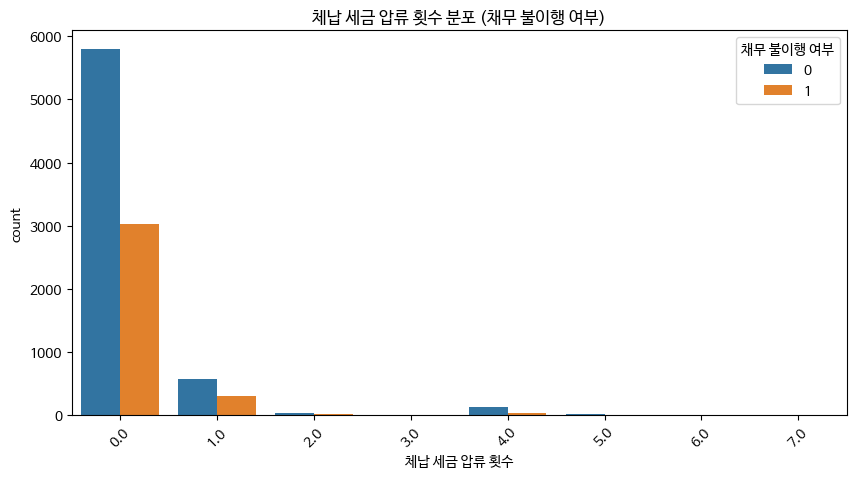

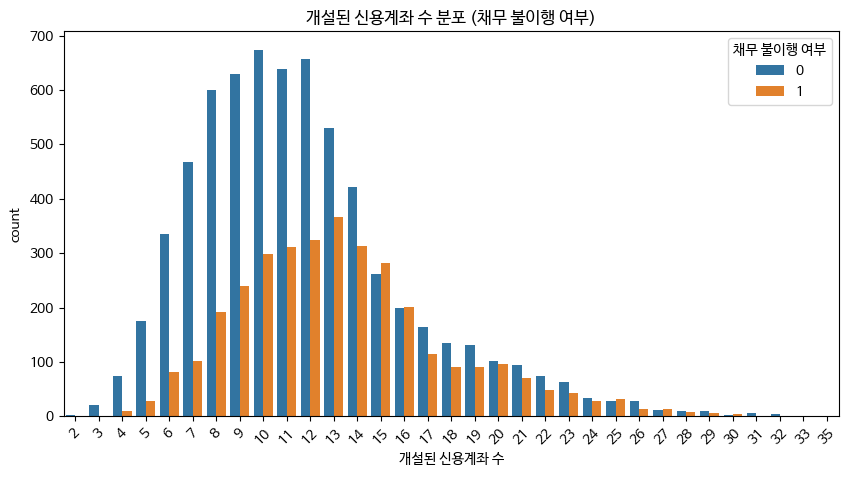

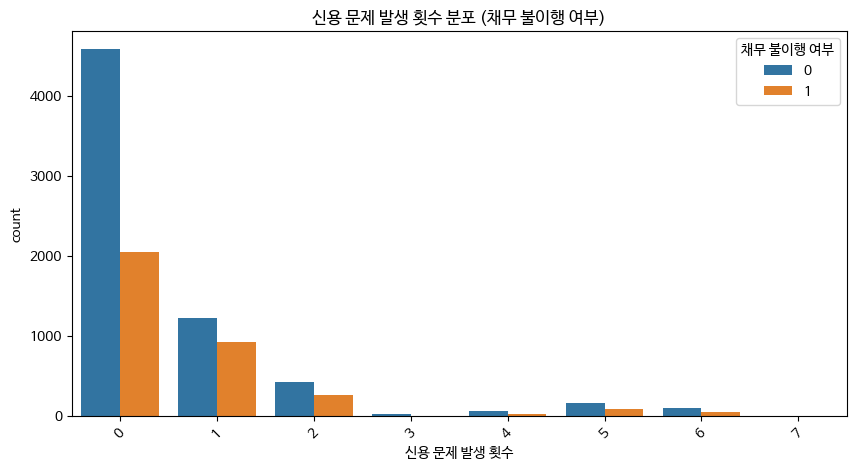

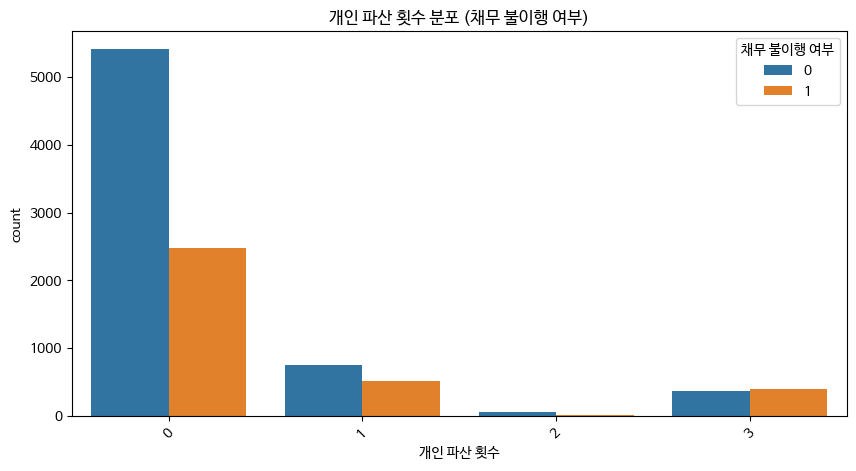

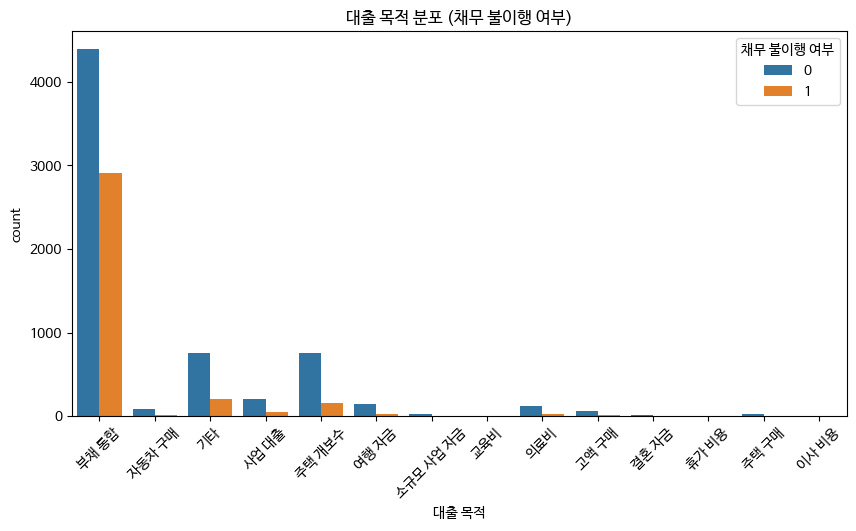

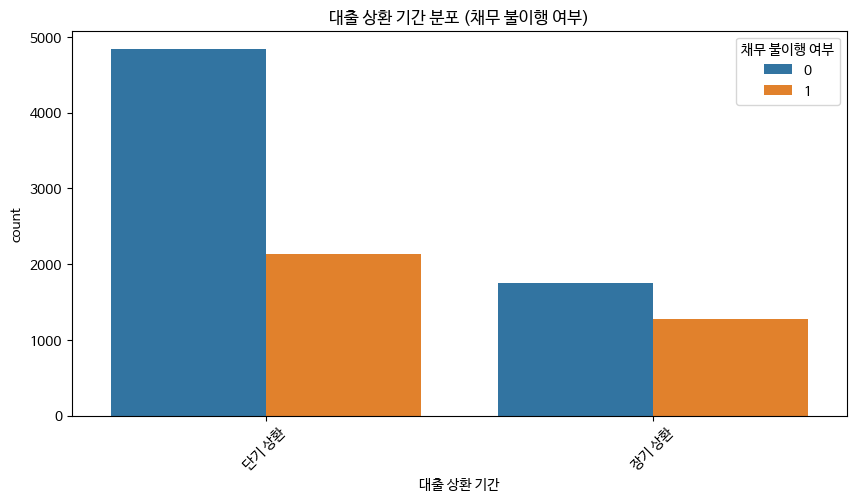

In [11]:
for col in col1:
    plt.figure(figsize=(10,5))
    sns.countplot(data=d, x=col, hue='채무 불이행 여부')
    plt.xticks(rotation=45)
    plt.title(f'{col} 분포 (채무 불이행 여부)')
    plt.show()

In [12]:
### 수치형 변수

In [13]:
col2= ['연간 소득',
 '신용 거래 연수',
 '최대 신용한도',
 '마지막 연체 이후 경과 개월 수',
 '현재 대출 잔액',
 '현재 미상환 신용액',
 '월 상환 부채액',
 '신용 점수']

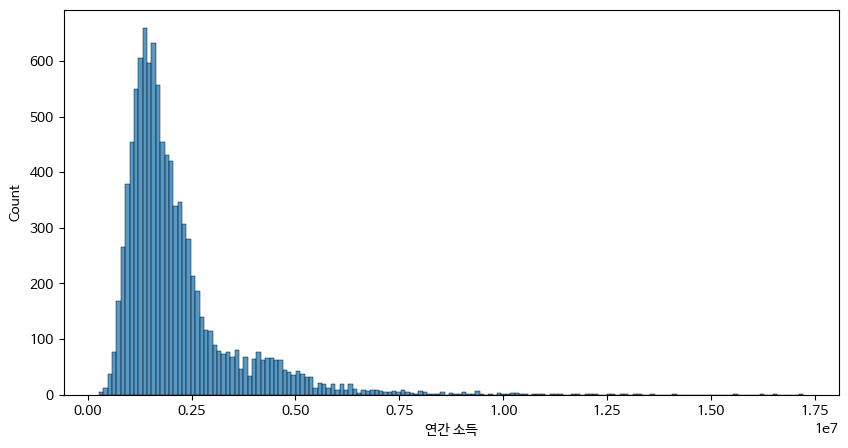

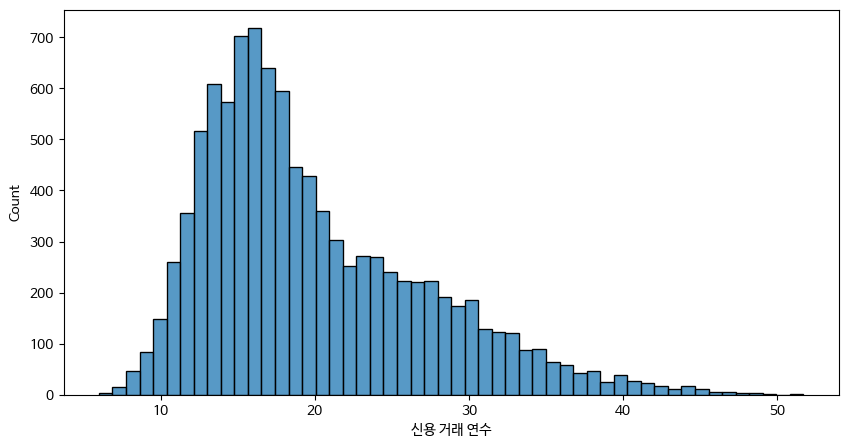

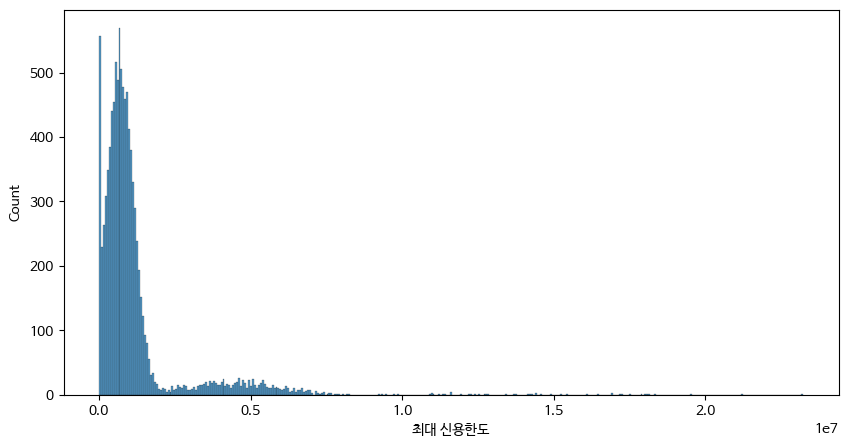

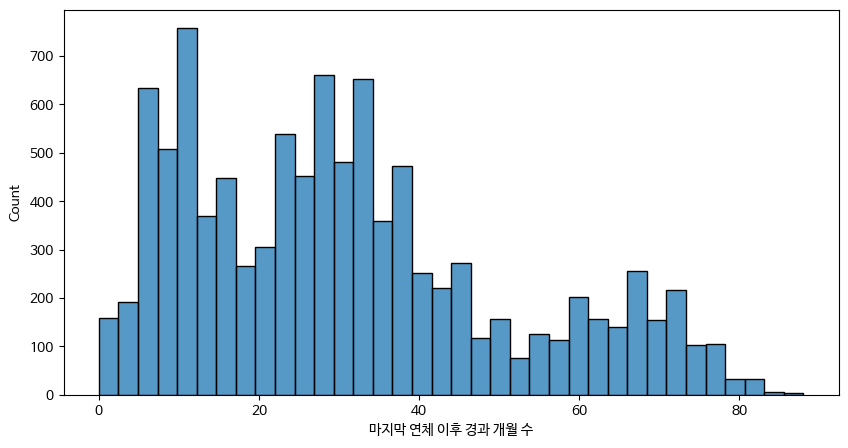

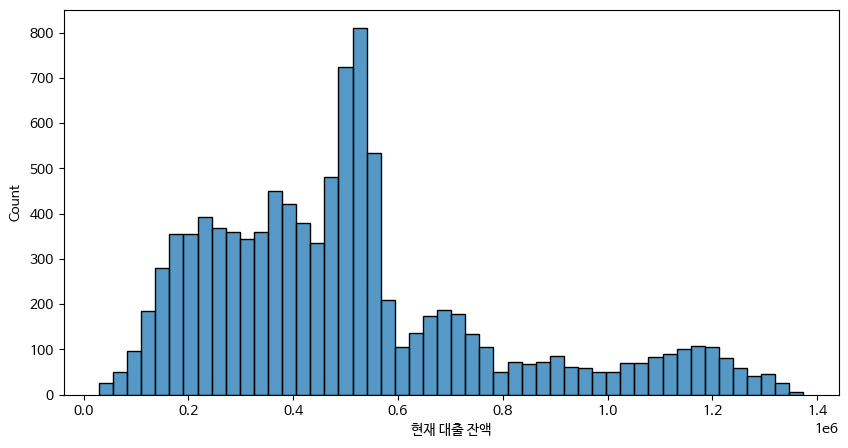

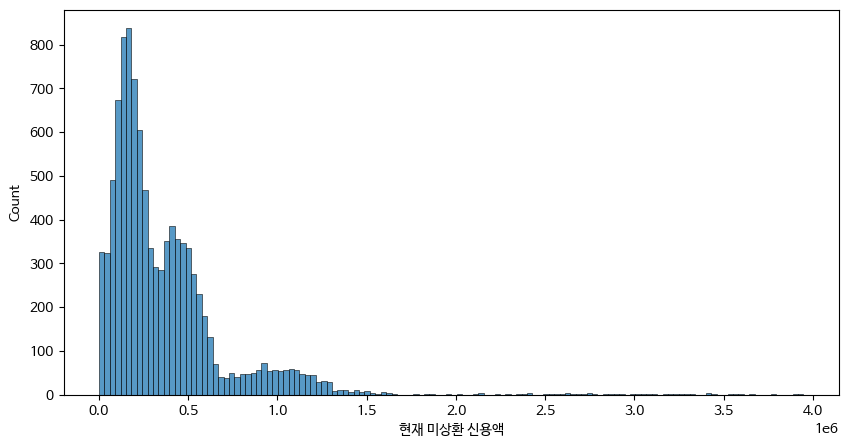

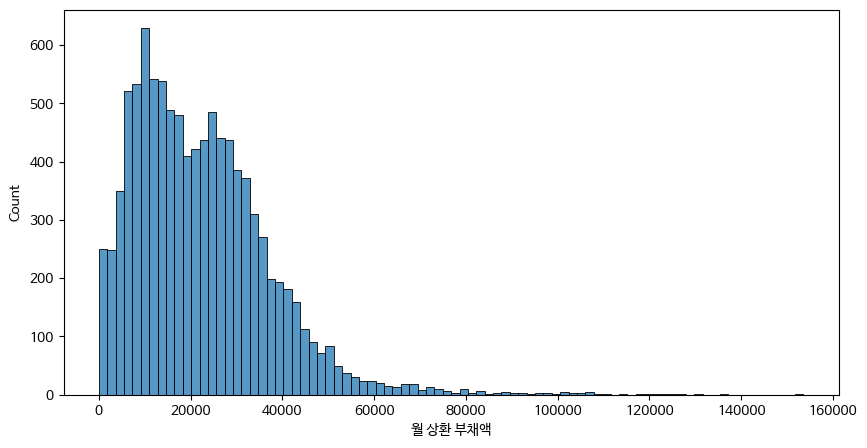

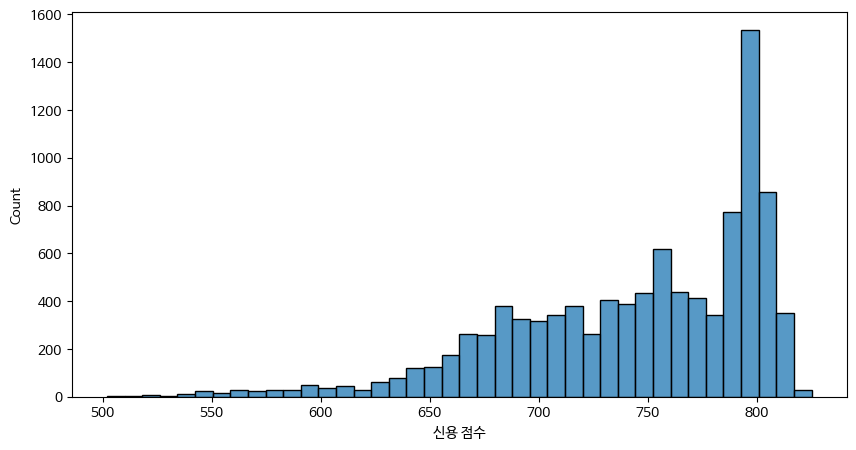

In [14]:
for col in col2:
    plt.figure(figsize=(10,5))
    sns.histplot(data=d, x=col)
    #plt.xticks(rotation=45)
    plt.show()

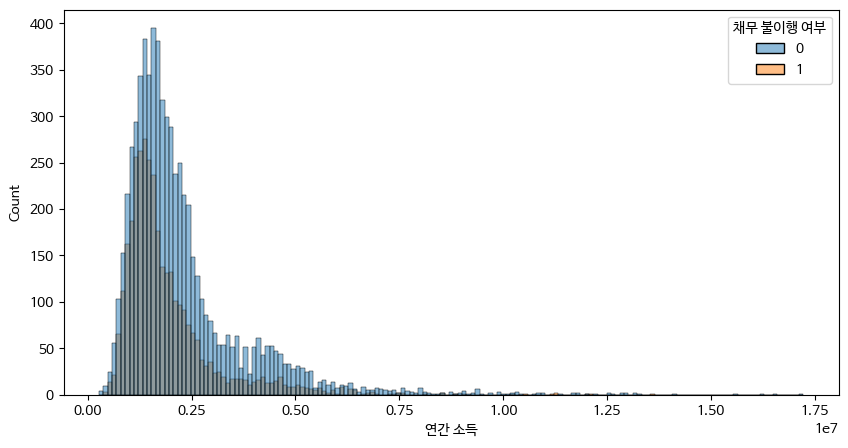

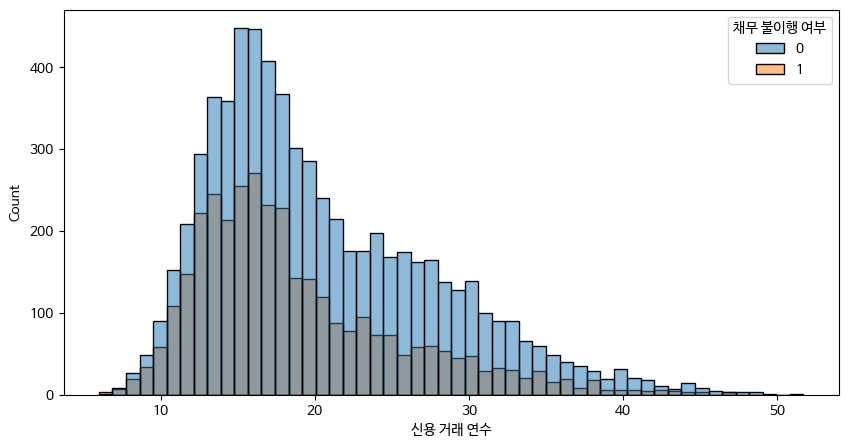

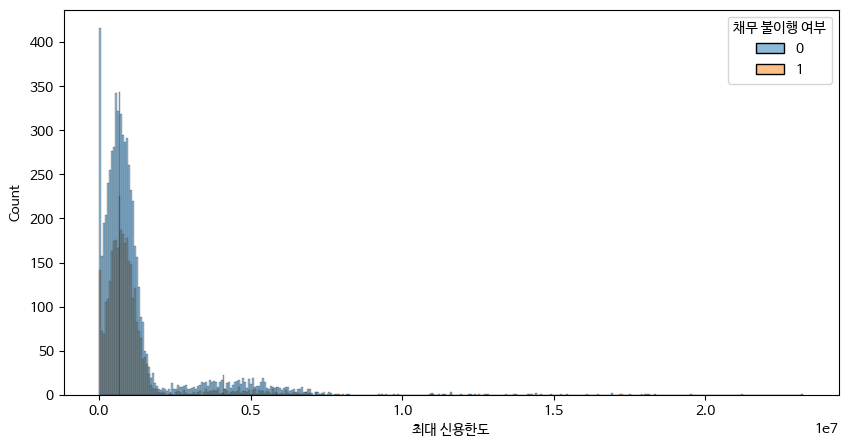

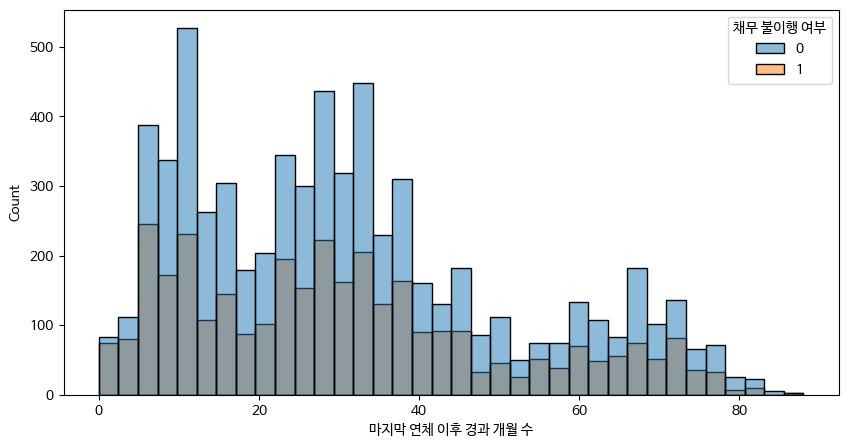

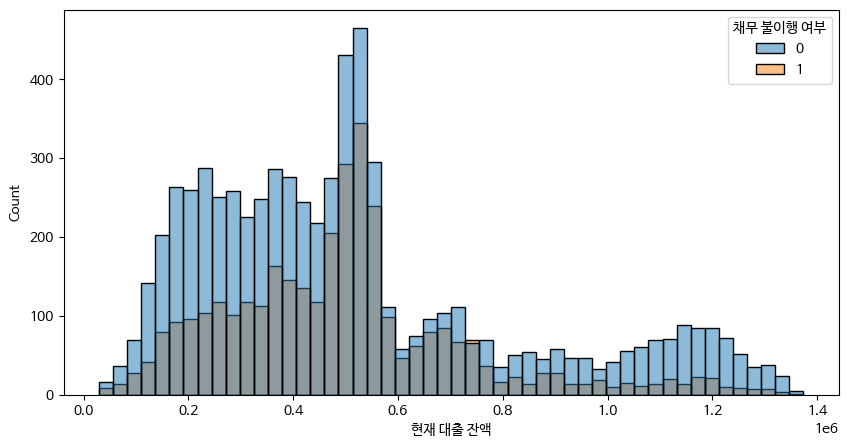

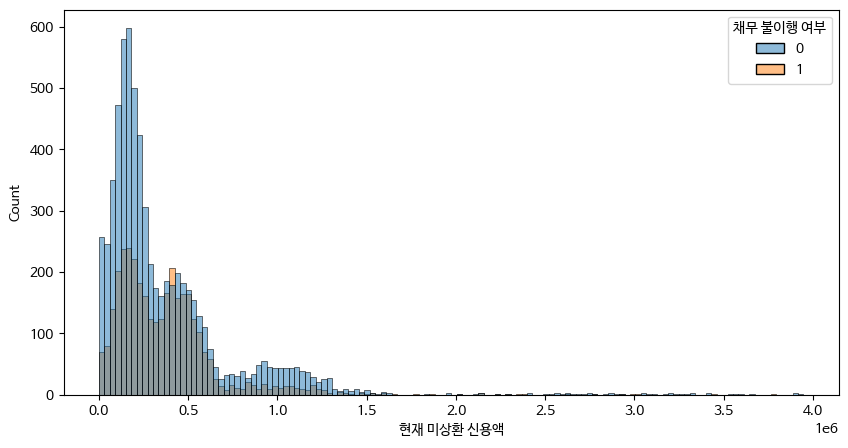

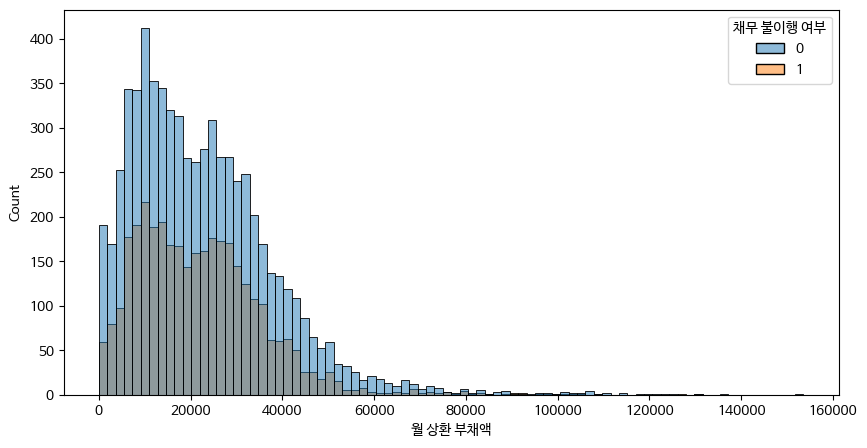

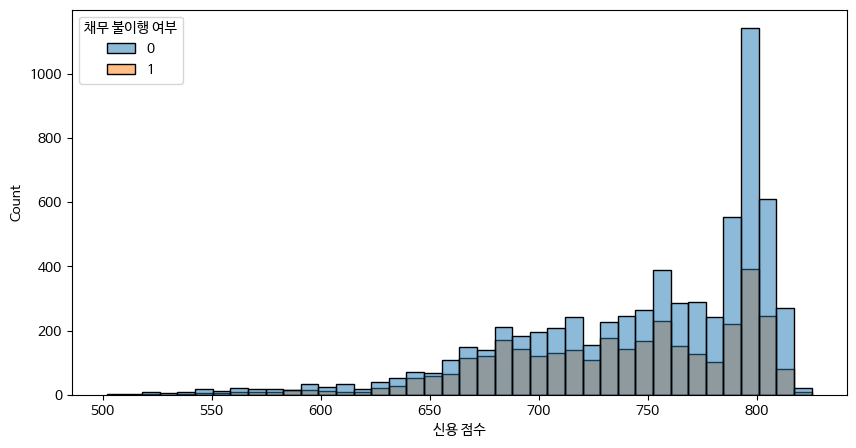

In [15]:
for col in col2:
    plt.figure(figsize=(10,5))
    sns.histplot(data=d, x=col, hue='채무 불이행 여부')
    #plt.xticks(rotation=45)
    plt.show()

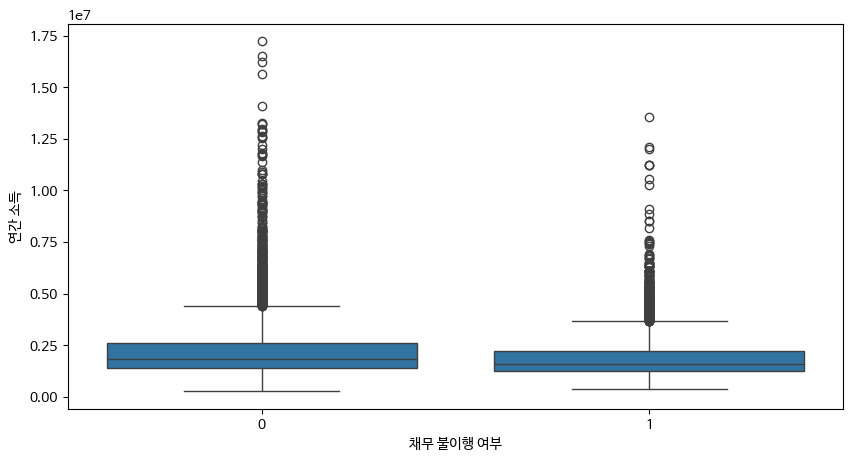

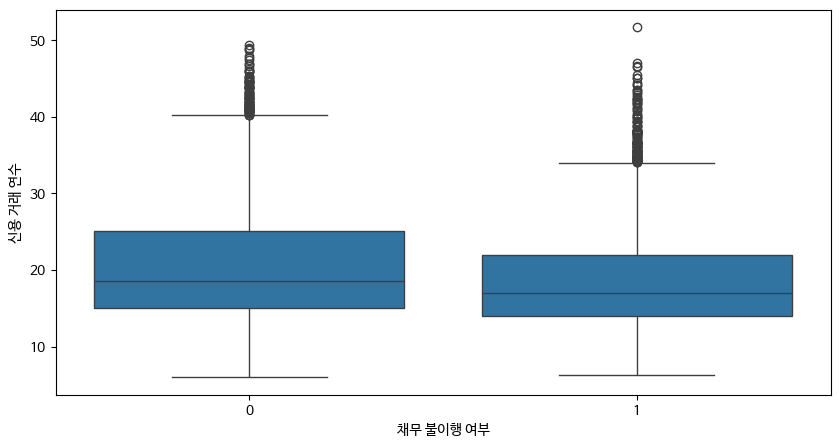

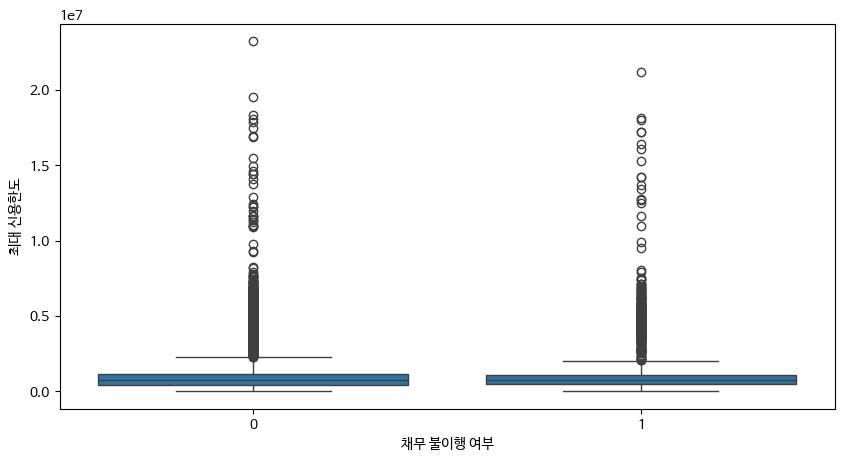

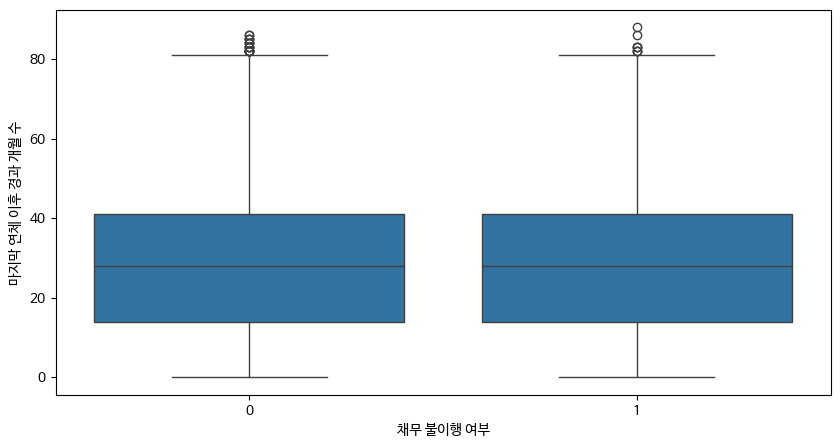

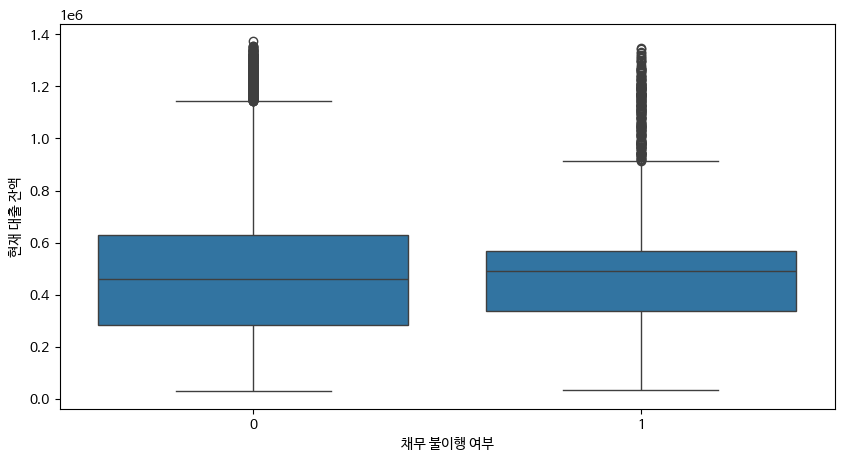

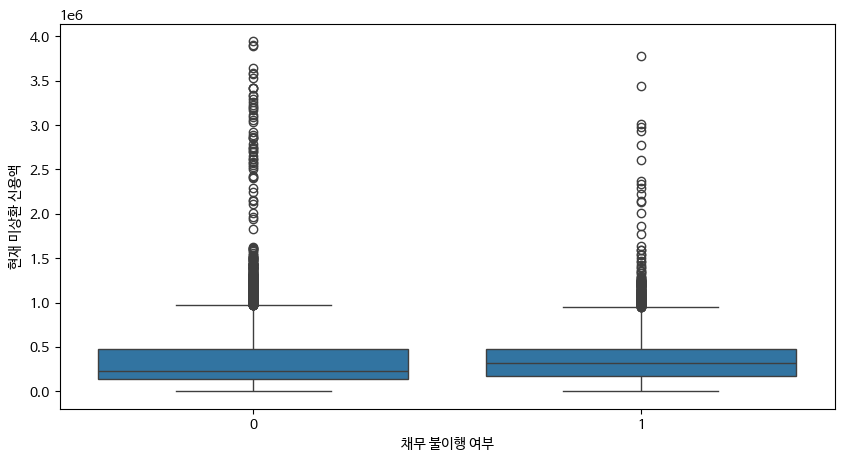

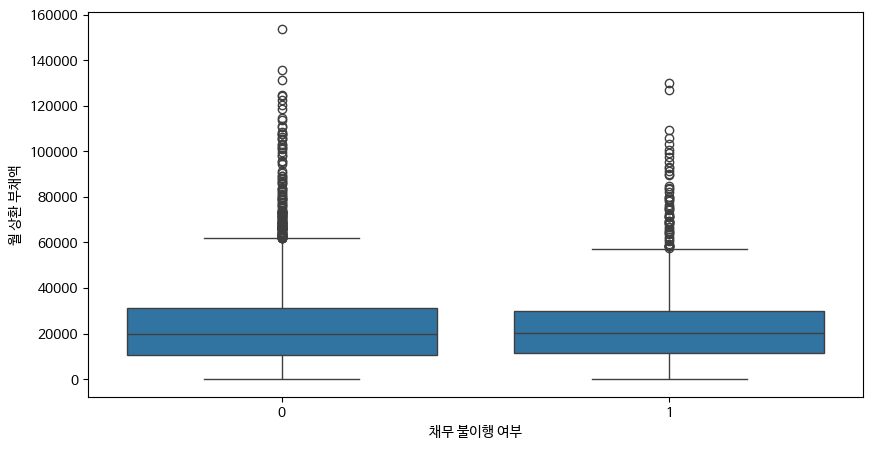

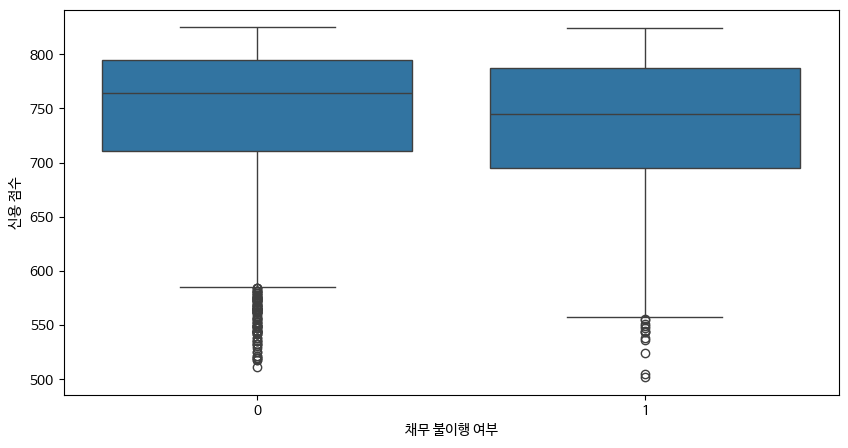

In [16]:
for col in col2:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=d, y=col, x='채무 불이행 여부')
    plt.show()

In [17]:
d['최대 신용한도_log'] = np.log1p(d['최대 신용한도'])

In [18]:
d['연간 소득_log'] = np.log1p(d['연간 소득'])

In [19]:
d['현재 미상환 신용액_log'] = np.log1p(d['현재 미상환 신용액'])

In [20]:
d['월 상환 부채액_log'] = np.log1p(d['월 상환 부채액'])

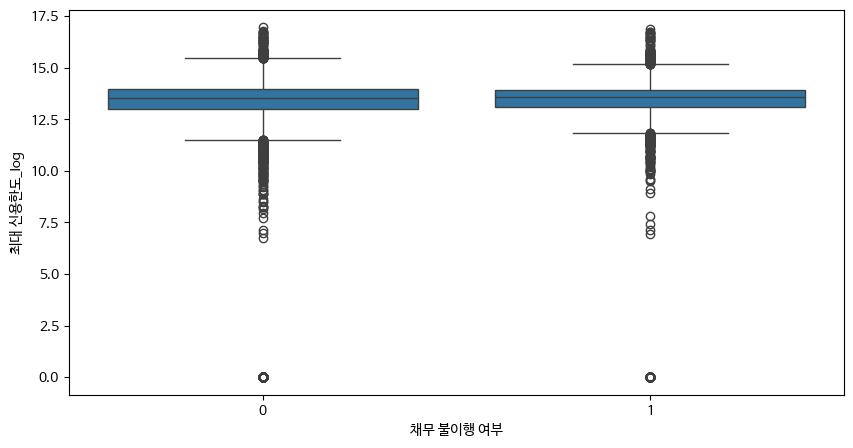

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=d,y='최대 신용한도_log', x='채무 불이행 여부')
plt.show()

In [22]:
### 전처리

In [23]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [24]:
d['현재 직장 근속 연수'].unique()

array(['10년 이상', '4년', '6년', '2년', '8년', '3년', '5년', '9년', '7년', '1년 미만',
       '1년'], dtype=object)

In [25]:
map_info1 = {
    '10년 이상' : 10,
    '4년' : 4,
    '6년' : 6,
    '2년' : 2,
    '8년' : 8,
    '3년' : 3,
    '5년' : 5,
    '9년' : 9,
    '7년' : 7,
    '1년 미만' : 0,
    '1년' : 1
}

d['현재 직장 근속 연수_map'] = d['현재 직장 근속 연수'].map(map_info1)

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [27]:

d['체납 세금 압류 횟수_new'] = d['체납 세금 압류 횟수'].astype(int).astype(str)


In [28]:
d['체납 세금 압류 횟수_new'].unique()

array(['0', '1', '2', '4', '6', '5', '3', '7'], dtype=object)

In [29]:
def function1(x):
    if x=='0':
        return '0회'
    elif x=='1':
        return '1회'
    else:
        return '2회 이상'
d['체납 세금 압류 횟수_new2'] = d['체납 세금 압류 횟수_new'].apply(function1)

In [30]:
d['신용 문제 발생 횟수'].unique()

array([0, 1, 2, 6, 5, 4, 3, 7])

In [31]:
d['신용 문제 발생 횟수_new'] = d['신용 문제 발생 횟수'].astype(str)

In [32]:
def function2(x):
    if x=='0':
        return '0회'
    elif x=='1':
        return '1회'
    elif x=='2':
        return '2회'
    else:
        return '3회 이상'
d['신용 문제 발생 횟수_new2'] = d['신용 문제 발생 횟수_new'].apply(function2)

In [33]:
d

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,...,채무 불이행 여부,최대 신용한도_log,연간 소득_log,현재 미상환 신용액_log,월 상환 부채액_log,현재 직장 근속 연수_map,체납 세금 압류 횟수_new,체납 세금 압류 횟수_new2,신용 문제 발생 횟수_new,신용 문제 발생 횟수_new2
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,...,0,12.900715,14.478888,12.325891,9.083359,10,0,0회,0,0회
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,...,0,12.795748,14.498358,11.078289,10.125130,10,0,0회,0,0회
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,...,1,13.105769,14.120331,13.097343,9.398478,4,0,0회,1,1회
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,...,1,12.927679,13.863366,12.931716,10.365648,6,0,0회,1,1회
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,...,0,13.704902,15.278817,11.277108,8.676417,2,0,0회,0,0회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,...,0,12.673036,14.107788,12.084072,8.738415,10,0,0회,0,0회
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,...,0,12.898721,14.647215,12.758377,10.883729,2,0,0회,0,0회
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,...,0,13.621083,14.015610,12.083377,9.344609,10,0,0회,0,0회
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,...,0,13.492982,15.022554,11.844353,10.149116,10,0,0회,0,0회


In [34]:
d['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

In [35]:
def function3(x):
    if x=='부채 통합':
        return '부채 통합'
    elif x=='사업 대출':
        return '사업 대출'
    elif x=='주택 개보수':
        return '주택 개보수'
    else :
        return '기타'

d['대출 목적_new'] = d['대출 목적'].apply(function3)

In [36]:
d

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,...,최대 신용한도_log,연간 소득_log,현재 미상환 신용액_log,월 상환 부채액_log,현재 직장 근속 연수_map,체납 세금 압류 횟수_new,체납 세금 압류 횟수_new2,신용 문제 발생 횟수_new,신용 문제 발생 횟수_new2,대출 목적_new
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,...,12.900715,14.478888,12.325891,9.083359,10,0,0회,0,0회,부채 통합
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,...,12.795748,14.498358,11.078289,10.125130,10,0,0회,0,0회,부채 통합
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,...,13.105769,14.120331,13.097343,9.398478,4,0,0회,1,1회,부채 통합
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,...,12.927679,13.863366,12.931716,10.365648,6,0,0회,1,1회,부채 통합
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,...,13.704902,15.278817,11.277108,8.676417,2,0,0회,0,0회,부채 통합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,...,12.673036,14.107788,12.084072,8.738415,10,0,0회,0,0회,부채 통합
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,...,12.898721,14.647215,12.758377,10.883729,2,0,0회,0,0회,주택 개보수
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,...,13.621083,14.015610,12.083377,9.344609,10,0,0회,0,0회,부채 통합
9998,TRAIN_09998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,...,13.492982,15.022554,11.844353,10.149116,10,0,0회,0,0회,부채 통합


In [37]:
d.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부', '최대 신용한도_log', '연간 소득_log', '현재 미상환 신용액_log',
       '월 상환 부채액_log', '현재 직장 근속 연수_map', '체납 세금 압류 횟수_new',
       '체납 세금 압류 횟수_new2', '신용 문제 발생 횟수_new', '신용 문제 발생 횟수_new2', '대출 목적_new'],
      dtype='object')

In [38]:
df = d[[ '주거 형태',  '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도',  '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
        '대출 상환 기간', '현재 대출 잔액',  '신용 점수',
       '채무 불이행 여부', '최대 신용한도_log', '현재 직장 근속 연수_map', '연간 소득_log',
       '현재 미상환 신용액_log', '월 상환 부채액_log',  '체납 세금 압류 횟수_new2',
        '신용 문제 발생 횟수_new2', '대출 목적_new']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   개설된 신용계좌 수         10000 non-null  int64  
 2   신용 거래 연수           10000 non-null  float64
 3   최대 신용한도            10000 non-null  float64
 4   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 5   개인 파산 횟수           10000 non-null  int64  
 6   대출 상환 기간           10000 non-null  object 
 7   현재 대출 잔액           10000 non-null  float64
 8   신용 점수              10000 non-null  int64  
 9   채무 불이행 여부          10000 non-null  int64  
 10  최대 신용한도_log        10000 non-null  float64
 11  현재 직장 근속 연수_map    10000 non-null  int64  
 12  연간 소득_log          10000 non-null  float64
 13  현재 미상환 신용액_log     10000 non-null  float64
 14  월 상환 부채액_log       10000 non-null  float64
 15  체납 세금 압류 횟수_new2   10000 non-null  object 
 16  신용 문제 발생 횟수_new2   1000

In [39]:
df.columns

Index(['주거 형태', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수', '대출 상환 기간', '현재 대출 잔액', '신용 점수', '채무 불이행 여부', '최대 신용한도_log',
       '현재 직장 근속 연수_map', '연간 소득_log', '현재 미상환 신용액_log', '월 상환 부채액_log',
       '체납 세금 압류 횟수_new2', '신용 문제 발생 횟수_new2', '대출 목적_new'],
      dtype='object')

In [40]:
df_num = df[['개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수',  '현재 대출 잔액', '신용 점수', '최대 신용한도_log',
       '현재 직장 근속 연수_map', '연간 소득_log', '현재 미상환 신용액_log', '월 상환 부채액_log']]

In [41]:
df_cat = df.drop(columns=['개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수',  '현재 대출 잔액', '신용 점수', '최대 신용한도_log',
       '현재 직장 근속 연수_map', '연간 소득_log', '현재 미상환 신용액_log', '월 상환 부채액_log'])

In [42]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   개설된 신용계좌 수         10000 non-null  int64  
 1   신용 거래 연수           10000 non-null  float64
 2   최대 신용한도            10000 non-null  float64
 3   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 4   개인 파산 횟수           10000 non-null  int64  
 5   현재 대출 잔액           10000 non-null  float64
 6   신용 점수              10000 non-null  int64  
 7   최대 신용한도_log        10000 non-null  float64
 8   현재 직장 근속 연수_map    10000 non-null  int64  
 9   연간 소득_log          10000 non-null  float64
 10  현재 미상환 신용액_log     10000 non-null  float64
 11  월 상환 부채액_log       10000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 937.6 KB


In [43]:
df_cat.drop(columns='채무 불이행 여부',inplace=True)

In [44]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   주거 형태             10000 non-null  object
 1   대출 상환 기간          10000 non-null  object
 2   체납 세금 압류 횟수_new2  10000 non-null  object
 3   신용 문제 발생 횟수_new2  10000 non-null  object
 4   대출 목적_new         10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [45]:
# 원핫인코딩

df_dummies = pd.get_dummies(df_cat)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)
scaled

array([[0.21212121, 0.1619256 , 0.0172431 , ..., 0.47578497, 0.81153915,
        0.76062626],
       [0.09090909, 0.19912473, 0.01552489, ..., 0.48045976, 0.72939675,
        0.84786254],
       [0.3030303 , 0.28008753, 0.0211675 , ..., 0.38969312, 0.86233167,
        0.78701386],
       ...,
       [0.21212121, 0.5273523 , 0.0354379 , ..., 0.36454887, 0.79557193,
        0.78250293],
       [0.24242424, 0.31291028, 0.03117698, ..., 0.60632273, 0.77983455,
        0.84987112],
       [0.09090909, 0.41356674, 0.00228128, ..., 0.50308817, 0.7624258 ,
        0.7911259 ]])

In [47]:
df_scaled = pd.DataFrame(scaled, columns = df_num.columns)


In [48]:
df_concat = pd.concat([df_scaled,df_dummies],axis=1)
df_concat

,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,신용 점수,최대 신용한도_log,현재 직장 근속 연수_map,연간 소득_log,...,체납 세금 압류 횟수_new2_1회,체납 세금 압류 횟수_new2_2회 이상,신용 문제 발생 횟수_new2_0회,신용 문제 발생 횟수_new2_1회,신용 문제 발생 횟수_new2_2회,신용 문제 발생 횟수_new2_3회 이상,대출 목적_new_기타,대출 목적_new_부채 통합,대출 목적_new_사업 대출,대출 목적_new_주택 개보수
0,0.212121,0.161926,0.017243,0.272727,0.333333,0.269054,0.820433,0.760608,1.0,0.475785,...,False,False,True,False,False,False,False,True,False,False
1,0.090909,0.199125,0.015525,0.125000,0.000000,0.723729,0.820433,0.754419,1.0,0.480460,...,False,False,True,False,False,False,False,True,False,False
2,0.303030,0.280088,0.021168,0.840909,1.000000,0.147719,0.922601,0.772698,0.4,0.389693,...,False,False,False,True,False,False,False,True,False,False
3,0.393939,0.192560,0.017714,0.250000,0.333333,0.165279,0.910217,0.762198,0.6,0.327994,...,False,False,False,True,False,False,False,True,False,False
4,0.272727,0.439825,0.038536,0.363636,0.000000,0.843476,0.770898,0.808022,0.2,0.667853,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.212121,0.277899,0.013732,0.772727,0.000000,0.072179,0.783282,0.747184,1.0,0.386681,...,False,False,True,False,False,False,False,True,False,False
9996,0.272727,0.487965,0.017209,0.079545,0.000000,0.254925,0.634675,0.760490,0.2,0.516201,...,False,False,True,False,False,False,False,False,False,True
9997,0.212121,0.527352,0.035438,0.159091,0.000000,0.625213,0.715170,0.803080,1.0,0.364549,...,False,False,True,False,False,False,False,True,False,False
9998,0.242424,0.312910,0.031177,0.284091,0.000000,0.307811,0.600619,0.795527,1.0,0.606323,...,False,False,True,False,False,False,False,True,False,False


In [49]:
X = df_concat.copy()
y = df['채무 불이행 여부']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [76]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_pred = xgb.predict(X_val)

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.83      0.74      0.79      2215
           1       0.44      0.58      0.50       785

    accuracy                           0.70      3000
   macro avg       0.64      0.66      0.64      3000
weighted avg       0.73      0.70      0.71      3000



In [79]:
y_pred_proba = xgb.predict_proba(X_val)[:, 1]

In [80]:
from sklearn.metrics import roc_auc_score

# y_true: 실제 정답값 (0 또는 1)
# y_pred_proba: 모델이 예측한 '1이 될 확률' (0~1 사이의 실수)
score = roc_auc_score(y_val, y_pred_proba)

In [81]:
print(score)

0.7081709023911943


In [89]:
print(xgb.get_params)

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)>


In [111]:
li = [i for i in range(10,500,10)]
#print(li)
result = []
for i in li:
    xgb = XGBClassifier(n_estimators=i)
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_train)
    y_pred_proba = xgb.predict_proba(X_train)[:, 1]
    score = roc_auc_score(y_train, y_pred_proba)
    result.append(score)

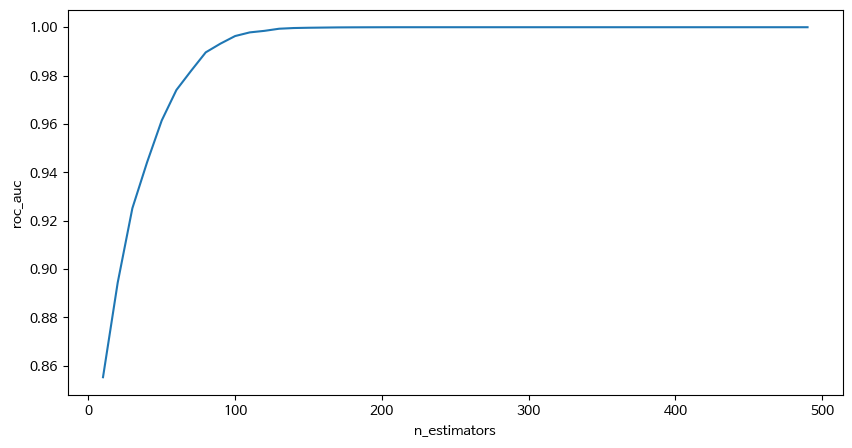

In [112]:
plt.figure(figsize=(10,5))
sns.lineplot(x=li, y=result)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

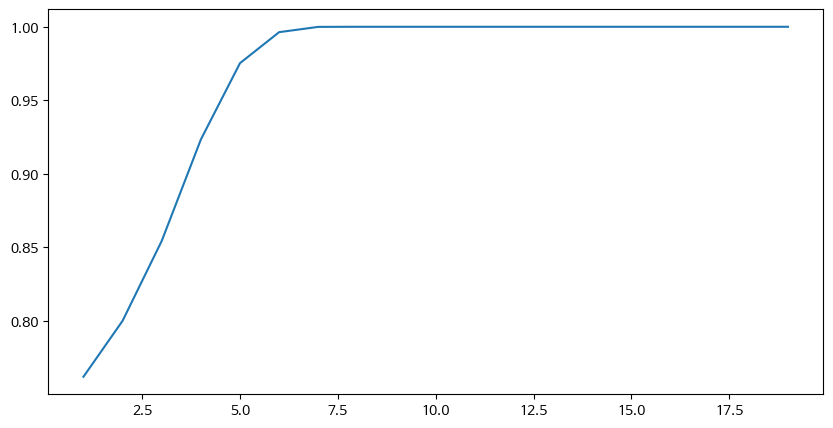

In [109]:
li = [i for i in range(1,20,1)]
#print(li)
result = []
for i in li:
    xgb = XGBClassifier(max_depth=i)
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_train)
    y_pred_proba = xgb.predict_proba(X_train)[:, 1]
    score = roc_auc_score(y_train, y_pred_proba)
    result.append(score)

plt.figure(figsize=(10,5))
sns.lineplot(x=li, y=result)
plt.show()

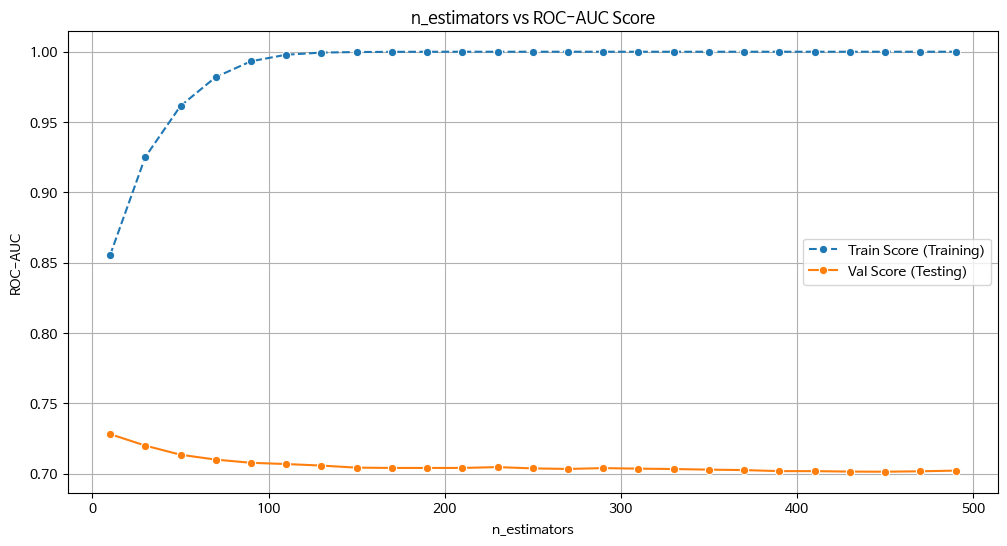

In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# X, y 데이터는 이미 정의되어 있다고 가정

li = [i for i in range(10, 500, 20)] # 간격을 20으로 넓혀서 속도 향상
train_scores = [] # 학습 점수 저장용
val_scores = []   # 검증 점수 저장용

for i in li:
    # 1. 모델 생성 (random_state 고정)
    xgb = XGBClassifier(n_estimators=i, random_state=42, eval_metric='logloss')

    # 2. 학습
    xgb.fit(X_train, y_train)

    # 3. 학습 데이터 평가 (과적합 확인용)
    y_train_proba = xgb.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_proba)
    train_scores.append(train_auc)

    # 4. 검증 데이터 평가 (실제 성능용)
    y_val_proba = xgb.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_val_proba)
    val_scores.append(val_auc)

    # 진행 상황 출력 (선택)
    # print(f"n_estimators={i} | Train: {train_auc:.4f} | Val: {val_auc:.4f}")

# 5. 그래프 그리기 (두 선을 함께 표시)
plt.figure(figsize=(12, 6))
sns.lineplot(x=li, y=train_scores, label='Train Score (Training)', marker='o', linestyle='--')
sns.lineplot(x=li, y=val_scores, label='Val Score (Testing)', marker='o')

plt.title("n_estimators vs ROC-AUC Score")
plt.xlabel("n_estimators")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()

In [104]:
p = xgb.get_params()
print(p)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 490, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [57]:
### 여기부터 하이퍼파라미터 튜닝

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    f1_score
)

# 1. 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

# 2. 모델 및 파라미터 그리드 설정
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
#xgb = XGBClassifier()


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'scale_pos_weight': [1, 2]
}

# 3. GridSearchCV 설정
# refit=True: 최적의 파라미터를 찾은 후, 전체 학습 데이터로 다시 학습시켜서 best_estimator_에 저장
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc', # 모델을 선택하는 기준
    n_jobs=-1,
    verbose=1
)

# 4. 학습 수행
grid_search.fit(X_train, y_train)

# 5. 최적의 모델 추출
best_model = grid_search.best_estimator_

# =========================================================
# ★ 여기가 요청하신 부분입니다: 모든 평가지표 계산 및 출력 ★
# =========================================================

# 예측값 (0 또는 1) - Accuracy, F1, Confusion Matrix용
y_pred = best_model.predict(X_val)

# 예측 확률 (0~1 사이 실수) - ROC-AUC용
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

print("\n" + "="*40)
print(f"최적 파라미터: {grid_search.best_params_}")
print("="*40)

# 1. 기본 지표 출력
print(f"Accuracy (정확도): {accuracy_score(y_val, y_pred):.4f}")
print(f"F1 Score (F1점수): {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC Score   : {roc_auc_score(y_val, y_pred_proba):.4f}")

print("-" * 40)

# 2. 혼동 행렬 (Confusion Matrix)
# [[TN, FP],
#  [FN, TP]]
print("Confusion Matrix (혼동 행렬):")
print(confusion_matrix(y_val, y_pred))

print("-" * 40)

# 3. 상세 리포트 (Precision, Recall, F1 한번에 보기)
print("Classification Report (상세 보고서):")
print(classification_report(y_val, y_pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits

최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2}
Accuracy (정확도): 0.6770
F1 Score (F1점수): 0.5942
ROC-AUC Score   : 0.7507
----------------------------------------
Confusion Matrix (혼동 행렬):
[[881 437]
 [209 473]]
----------------------------------------
Classification Report (상세 보고서):
              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1318
           1       0.52      0.69      0.59       682

    accuracy                           0.68      2000
   macro avg       0.66      0.68      0.66      2000
weighted avg       0.71      0.68      0.68      2000



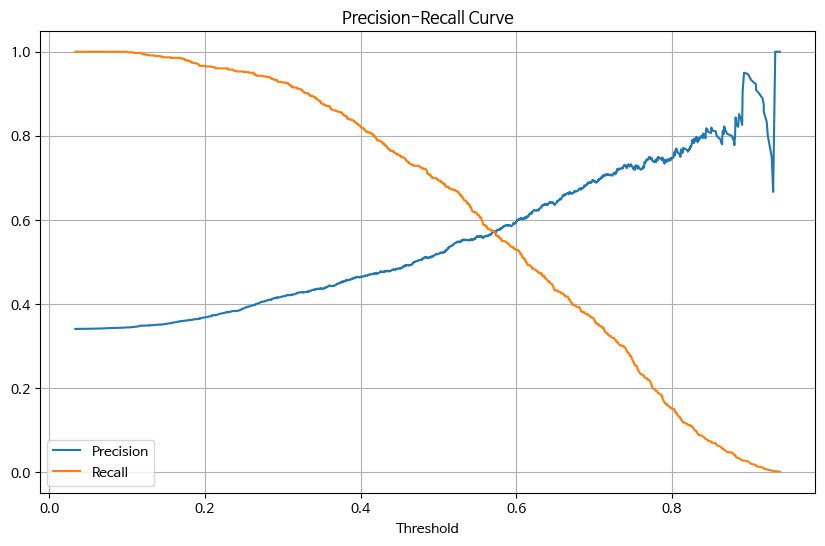

In [59]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. 확률값 예측
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# 2. PR Curve 계산
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)

# 3. 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

=== Final Threshold: 0.55 ===
✅ Accuracy (정확도) : 0.7035
✅ F1 Score (조화평균): 0.5850
✅ ROC-AUC (변별력)  : 0.7507
------------------------------

[Confusion Matrix]
[[989 329]
 [264 418]]

[Classification Report]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1318
           1       0.56      0.61      0.59       682

    accuracy                           0.70      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.71      0.70      0.71      2000



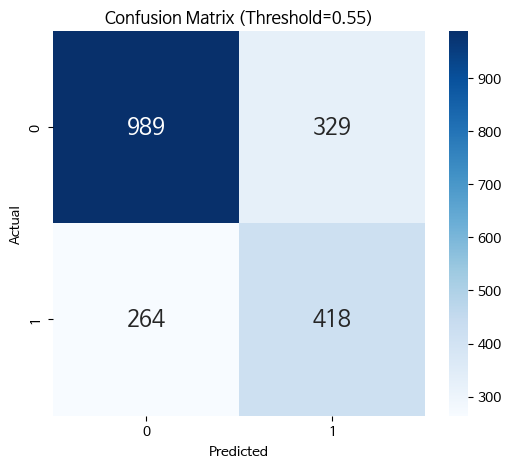

In [60]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 임계값 설정
final_threshold = 0.55

# 2. 확률값 예측
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# 3. 임계값 적용 (0/1 변환)
y_pred_final = (y_pred_proba >= final_threshold).astype(int)

# 4. 평가지표 계산
# 주의: ROC-AUC는 확률값(proba)을 넣어야 합니다!
acc = accuracy_score(y_val, y_pred_final)
f1 = f1_score(y_val, y_pred_final)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# 5. 결과 출력
print(f"=== Final Threshold: {final_threshold} ===")
print(f"✅ Accuracy (정확도) : {acc:.4f}")
print(f"✅ F1 Score (조화평균): {f1:.4f}")
print(f"✅ ROC-AUC (변별력)  : {roc_auc:.4f}")
print("-" * 30)

print("\n[Confusion Matrix]")
cm = confusion_matrix(y_val, y_pred_final)
print(cm)

print("\n[Classification Report]")
print(classification_report(y_val, y_pred_final))

# (선택) 혼동행렬 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title(f'Confusion Matrix (Threshold={final_threshold})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
y_pred_final

array([1, 1, 0, ..., 1, 0, 0])

In [70]:
X_val

,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,신용 점수,최대 신용한도_log,현재 직장 근속 연수_map,연간 소득_log,...,체납 세금 압류 횟수_new2_1회,체납 세금 압류 횟수_new2_2회 이상,신용 문제 발생 횟수_new2_0회,신용 문제 발생 횟수_new2_1회,신용 문제 발생 횟수_new2_2회,신용 문제 발생 횟수_new2_3회 이상,대출 목적_new_기타,대출 목적_new_부채 통합,대출 목적_new_사업 대출,대출 목적_new_주택 개보수
8667,0.393939,0.275711,0.011133,0.761364,0.000000,0.185146,0.814241,0.734811,0.2,0.328580,...,False,False,True,False,False,False,False,True,False,False
9123,0.515152,0.505470,0.046693,0.284091,0.333333,0.404060,0.640867,0.819342,0.8,0.423325,...,False,True,False,True,False,False,False,True,False,False
9264,0.575758,0.356674,0.007848,0.568182,0.333333,0.547100,0.910217,0.714195,1.0,0.620989,...,True,False,False,True,False,False,False,False,False,True
947,0.363636,0.361050,0.020373,0.431818,1.000000,0.278980,0.653251,0.770443,0.4,0.486708,...,False,False,False,False,False,True,False,True,False,False
1382,0.303030,0.328228,0.024298,0.750000,0.000000,0.300669,0.820433,0.780830,1.0,0.433645,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,0.393939,0.308534,0.015628,0.840909,1.000000,0.193838,0.944272,0.754810,0.8,0.365232,...,False,False,False,False,False,True,False,True,False,False
1150,0.545455,0.196937,0.052464,0.420455,0.333333,0.309045,0.783282,0.826212,0.9,0.405372,...,False,False,False,True,False,False,False,True,False,False
9842,0.363636,0.181619,0.024510,0.045455,0.000000,0.519627,0.427245,0.781342,0.3,0.464140,...,False,False,True,False,False,False,False,True,False,False
3641,0.151515,0.253829,0.000000,0.272727,0.000000,0.193371,0.888545,0.000000,1.0,0.458986,...,True,False,True,False,False,False,True,False,False,False


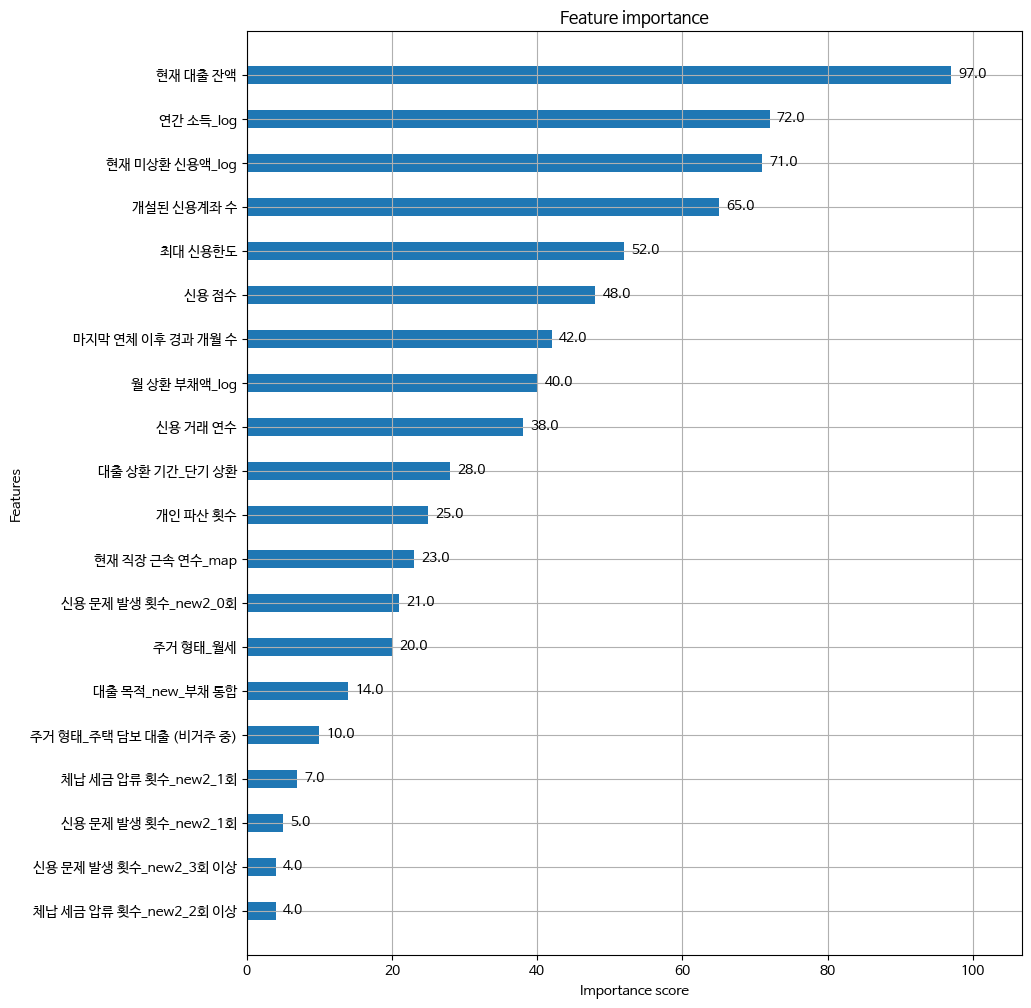

In [73]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax, max_num_features=20, height=0.4) # 상위 20개만 표시
plt.show()

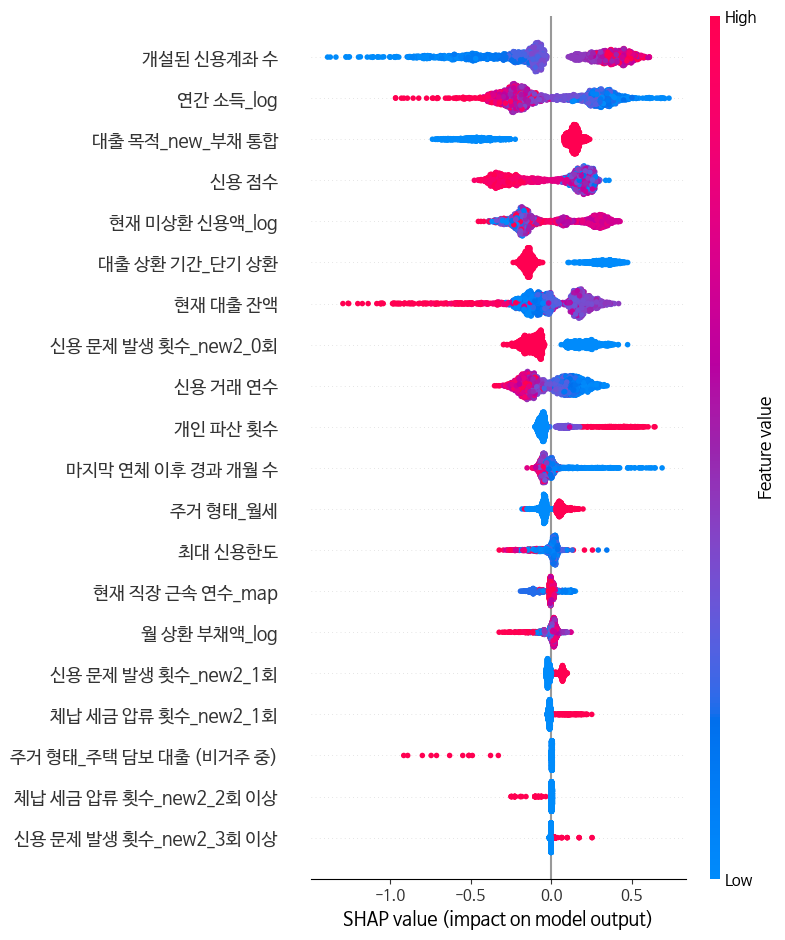

In [74]:
import shap

# 1. Explainer 생성
explainer = shap.TreeExplainer(best_model)

# 2. SHAP 값 계산 (시간이 좀 걸릴 수 있음)
shap_values = explainer.shap_values(X_val)

# 3. 요약 차트 그리기
shap.summary_plot(shap_values, X_val)

/usr/local/lib/python3.12/dist-packages/shap/plots/_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


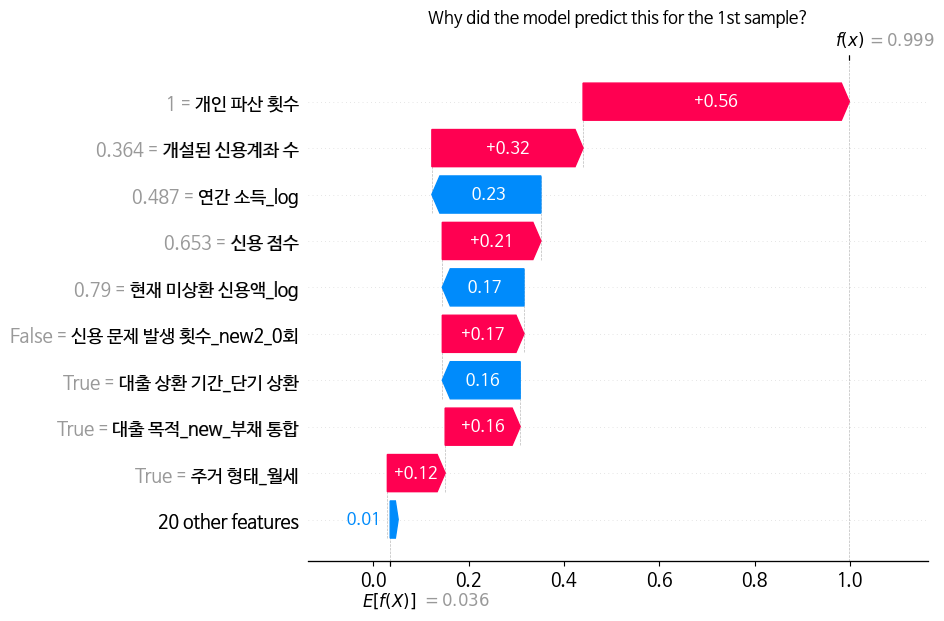

In [72]:
explainer_obj = shap.Explainer(best_model)
shap_values_obj = explainer_obj(X_val)

# 첫 번째 데이터에 대한 설명 시각화
plt.title("Why did the model predict this for the 1st sample?")
shap.plots.waterfall(shap_values_obj[3])

In [64]:
shap.initjs()
shap.force_plot(shap_values_obj[0])

In [65]:
print(shap_values_obj[0])

.values =
array([ 5.2955627e-01, -1.1688802e-01, -3.8655549e-02, -7.2492979e-02,
       -6.7978166e-02, -9.6582726e-02,  7.5296566e-02,  0.0000000e+00,
       -5.6521077e-02,  4.0145570e-01, -1.9648238e-01,  3.2764744e-02,
       -4.7793329e-02,  0.0000000e+00,  1.1602023e-04,  4.4978857e-03,
        4.4767883e-01,  0.0000000e+00, -5.9168151e-04, -7.0657060e-03,
        6.3423170e-03, -1.4899582e-01, -2.5146775e-02, -2.9459823e-04,
       -4.9592345e-04,  3.1922208e-03,  1.2869346e-01,  1.2286224e-04,
        3.2889444e-04], dtype=float32)

.base_values =
np.float32(0.035665665)

.data =
array([0.393939393939394, 0.275711159737418, 0.011132523797760646,
       0.7613636363636364, 0.0, 0.18514634198045057, 0.8142414860681115,
       0.7348112833980436, 0.2, 0.328579955386163, 0.7123730671835065,
       0.8621244656111681, False, False, True, False, False, True, True,
       False, False, True, False, False, False, False, True, False, False],
      dtype=object)
